<a href="https://colab.research.google.com/github/siamkhanra/Train-and-Test-Neural-Network/blob/main/Train_and_Test_the_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment-02** 
**Course Title : Neural Networks and Applications**

**Course Code : ICE477**


**Name : Md. Arafat Hossain Siam**

**ID : 2018-2-50-018**

# **Import Libararies**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from IPython.display import Image
from pprint import pprint
import io
from IPython import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# **Uploading Files**

In [ ]:
uploaded = files.upload()
# Converting csv files into pandas dataframe df and to store in it
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
df1 = df
df.head()

Saving iris.csv to iris.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# One-hot encoding
species_one_hot = pd.get_dummies(df.species)
df = df.join(species_one_hot)

In [ ]:
y = pd.get_dummies(df.species).values
#y = y[[1,51,101]]
y = np.array(y)
N = y.size
print(N)
x = df1.drop(["species"], axis = 1).values
#x = x[[1,51,101]]
x = np.array(x)
#print(x)
#print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 20, random_state = 4)
#N = y_train.size
#print(N)
#print(x_test)

450


# **Helper Functions**

In [ ]:
def sigmoid (x) :
  return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels) :
  N = labels.size
  mse = ((predictions-labels)**2).sum()/(2*N)
  return mse

def accuracy (predictions,labels) :
  predictions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
  accuracy = predictions_correct.mean()
  return accuracy

# **Hyperparameters**

In [ ]:
learning_rate = 0.1
epochs = 10000
n_input = 4
n_hidden = 2
n_output = 3

In [ ]:
np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input,n_hidden))
weights_2 = np.random.normal(scale=0.5, size=(n_hidden,n_output))
print("W1=\n",weights_1)
print("W2=\n",weights_2)

W1=
 [[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]
W2=
 [[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


# **Feedforward and Backpropagation**

In [ ]:
monitoring = {"mean_squared_error":[], "accuracy":[]}
for epoch in range(epochs):
  # Feedforward
  hidden_layer_inputs = np.dot(x_train,weights_1)
  hidden_layer_outputs = sigmoid(hidden_layer_inputs)
  output_layer_inputs = np.dot(hidden_layer_outputs,weights_2)
  output_layer_outputs = sigmoid(output_layer_inputs)

  # Monitoring training progress
  mse = mean_squared_error(output_layer_outputs,y_train)
  acc = accuracy(output_layer_outputs,y_train)
  monitoring["mean_squared_error"].append(mse)
  monitoring["accuracy"].append(acc)

  # Backpropagation
  output_layer_error = output_layer_outputs - y_train
  output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

  hidden_layer_error = np.dot(output_layer_delta,weights_2.T)
  hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

  # Weights updates
  weights_2_update = np.dot(hidden_layer_outputs.T,output_layer_delta)/N 
  weights_1_update = np.dot(x_train.T, hidden_layer_delta)/N 

  # Update weights using gradient descent 
  weights_2 = weights_2 - learning_rate * weights_2_update
  weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

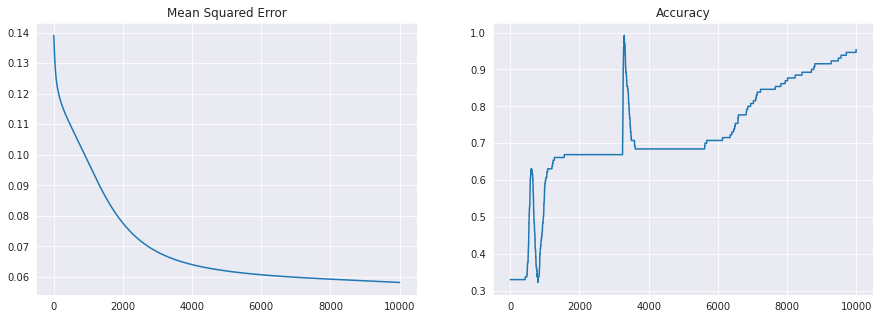

In [ ]:
fig, axes = plt.subplots(1,2,figsize =(15,5))
monitoring_df.mean_squared_error.plot(ax=axes[0],title ="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1],title= "Accuracy")

In [ ]:
# Feedforward
hidden_layer_inputs = np.dot(x_test,weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)
output_layer_inputs = np.dot(hidden_layer_outputs,weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [ ]:
acc = accuracy(output_layer_outputs,y_test)
print("Accuraccy:{}".format(acc))

Accuraccy:0.9
